In [ ]:
#
# Statistical Analysis for the Flat Scan Sampling single core
# João Inácio, Mar. 31st, 2021
# 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
# System and simulation information

dim = "2D"
lattice = "SS"
NN = 4

L = 4
N_atm = 1 * L ** 2

max_E = (1 / 2) * NN * N_atm
max_M = N_atm
NE = int(1 + (max_E / 2))
NM = N_atm + 1
energies = np.linspace(- max_E, max_E, NE)
magnetizations = np.linspace(- max_M, max_M, NM)

REP = 10**5
skip = N_atm

q_max = (NM + 1) // 2 - 2
if NM % 2 == 0:
    q_max = NM // 2 - 3


In [3]:
# Get the data

n_run = 1000

JDOS_all = list()
wall_time_all = np.zeros(n_run)
q_time_E_all = np.zeros(n_run)

cfg_chkbrd = np.zeros(n_run)
cfg_slice = np.zeros(n_run)
cfg_zerozero = np.zeros(n_run)

for run in range(1, n_run + 1):
    file_name = "".join(("./data_SS/L", str(L), "/", str(int(np.log10(REP))), 
                             "/", str(run), "_JDOS_FSS_Ising_", dim, "_", lattice, 
                             "_L", str(L), "_REP_1E", str(int(np.log10(REP))), 
                             "_skip_", str(skip)))
    JDOS = np.loadtxt(file_name + ".txt")
    JDOS[:, q_max+2:NM] = JDOS[:, range(q_max, -1, -1)]
    
    cfg_chkbrd[run - 1] = JDOS[len(energies) - 1, q_max+1]
    cfg_slice[run - 1] = JDOS[L, q_max+1]
    cfg_zerozero[run - 1] = JDOS[np.where(energies == 0)[0][0], q_max+1]

    JDOS_all.append(JDOS)
    
    with open(file_name + "_data.txt", 'r') as data_file:
        header = data_file.readline().strip("\n")
        
        q_time_E = np.zeros(q_max)
        for i in range(0, q_max):
            line = data_file.readline().strip("\n").split(" ")
            q_time_E[i] = float(line[4])

        wall_time_all[run - 1] = float(data_file.readline().strip("\n"))
        q_time_E_all[run - 1] = np.sum(q_time_E)

JDOS_mean = sum(JDOS_all) / n_run
wall_time_mean = sum(wall_time_all) / n_run
q_time_E_mean = np.average(q_time_E_all)
    
print("Mean Wall time: {:.5f} seconds".format(wall_time_mean))
print("Mean q_time / E: {:.5f} seconds".format(q_time_E_mean))


Mean Wall time: 4.11001 seconds
Mean q_time / E: 0.80832 seconds


mean: 2.00001; var: 0.00515
mean: 7.99994; var: 0.03078
mean: 4356.04324; var: 2.53180


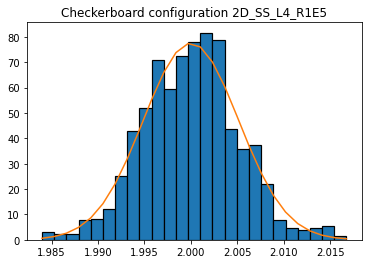

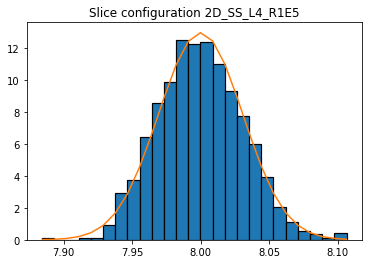

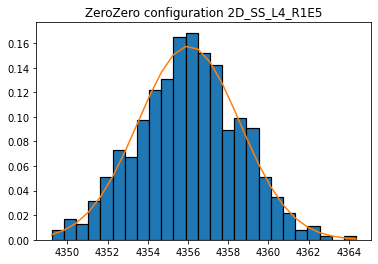

In [4]:
# Fit normal distributions to configurations

# Checkerboard
plt.figure(1)
_, bins, _ = plt.hist(cfg_chkbrd, 25, density=True, alpha=1, edgecolor='black', linewidth=1.2)

fit_chkbrd = norm.fit(cfg_chkbrd)
best_fit_line = norm.pdf(bins, fit_chkbrd[0], fit_chkbrd[1])
print("mean: {:.5f}; var: {:.5f}".format(fit_chkbrd[0], fit_chkbrd[1]))

plt.plot(bins, best_fit_line)
plt.title("Checkerboard configuration " + dim + "_" + 
          lattice + "_L" + str(L) + "_R1E" + str(int(np.log10(REP))))

# Slice
plt.figure(2)
_, bins, _ = plt.hist(cfg_slice, 25, density=True, alpha=1, edgecolor='black', linewidth=1.2)

fit_slice = norm.fit(cfg_slice)
best_fit_line = norm.pdf(bins, fit_slice[0], fit_slice[1])
print("mean: {:.5f}; var: {:.5f}".format(fit_slice[0], fit_slice[1]))

plt.plot(bins, best_fit_line)
plt.title("Slice configuration " + dim + "_" + 
          lattice + "_L" + str(L) + "_R1E" + str(int(np.log10(REP))))

# Zerozero
plt.figure(3)
_, bins, _ = plt.hist(cfg_zerozero, 25, density=True, alpha=1, edgecolor='black', linewidth=1.2)

fit_zerozero = norm.fit(cfg_zerozero)
best_fit_line = norm.pdf(bins, fit_zerozero[0], fit_zerozero[1])
print("mean: {:.5f}; var: {:.5f}".format(fit_zerozero[0], fit_zerozero[1]))

plt.plot(bins, best_fit_line)
plt.title("ZeroZero configuration " + dim + "_" + 
          lattice + "_L" + str(L) + "_R1E" + str(int(np.log10(REP))))
plt.show()


Mean absolute error: 0.07231
Mean error: -0.00043; var error: 0.02587
--------------------------------


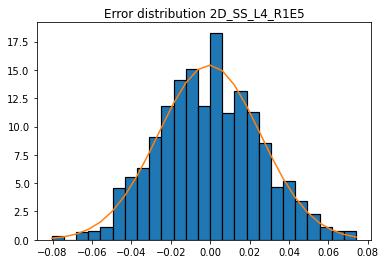

In [5]:
# If L = 4, compute error

if L == 4:
    JDOS_exact = np.loadtxt('JDOS_exact_L4_SS.txt')
    
    error_all = list()
    error_all_abs = list()
    
    for run in range(0, n_run):
        JDOS_error = JDOS_all[run] - JDOS_exact
        JDOS_error = JDOS_error[np.where(JDOS_exact > 0)[0], np.where(JDOS_exact > 0)[1]] / JDOS_exact[np.where(JDOS_exact > 0)[0], np.where(JDOS_exact > 0)[1]]
        error_all.append(np.sum(np.sum(JDOS_error)))
        
        JDOS_error_abs = np.abs(JDOS_all[run] - JDOS_exact)
        JDOS_error_abs = JDOS_error_abs[np.where(JDOS_exact > 0)[0], np.where(JDOS_exact > 0)[1]] / JDOS_exact[np.where(JDOS_exact > 0)[0], np.where(JDOS_exact > 0)[1]]
        error_all_abs.append(np.sum(np.sum(JDOS_error_abs)))
    
    print("Mean absolute error: {:0.5f}".format(np.mean(error_all_abs)))
    
    _, bins, _ = plt.hist(error_all, 25, density=True, alpha=1, edgecolor='black', linewidth=1.2)

    fit_error = norm.fit(error_all)
    best_fit_line = norm.pdf(bins, fit_error[0], fit_error[1])
    print("Mean error: {:.5f}; var error: {:.5f}".format(fit_error[0], fit_error[1]))
    print("--------------------------------")
    
    plt.plot(bins, best_fit_line)
    plt.title("Error distribution " + dim + "_" + 
              lattice + "_L" + str(L) + "_R1E" + str(int(np.log10(REP))))
    plt.show()
    